# Hedonic Pricing
##### Zoe Gates #####
We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [2]:
#Importing necessary tools to visualize, clean, load and eventually model data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bnb= pd.read_csv("https://raw.githubusercontent.com/ds4e/linearModels/refs/heads/main/lab/data/airbnb_hw.csv") #Loading airbnb data

In [4]:
bnb #Checking

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


#### Markdown ####

In [6]:
print(bnb.dtypes) #Checking the data types and number of variables and observations in the dataset
bnb.shape

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object


(30478, 13)

In [7]:
bnb=bnb.dropna() #Dropping nan values

In [8]:
bnb

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30332,42349033,8/24/2015,Cute cozy studio in east village,Manhattan,Apartment,100.0,Entire home/apt,10003.0,1.0,1,1,90,100.0
30347,42430249,8/24/2015,Room in new spacious loft!,Brooklyn,Apartment,80.0,Private room,11222.0,1.0,1,1,65,80.0
30378,42518458,8/25/2015,Williamsburg Luxury Loft!??Bed Top,Brooklyn,Loft,100.0,Shared room,11206.0,1.0,1,1,55,100.0
30404,42697124,8/27/2015,"Cute, Clean Room- East Williamsburg",Brooklyn,Apartment,100.0,Private room,11206.0,1.0,1,1,60,100.0


In [9]:
bnb.shape #Checking the shape after dropping nans to see how it affected the columns

(22010, 13)

In [10]:
bnb['Host Since'] = pd.to_datetime(bnb['Host Since'], errors='coerce') #Casting 'Host Since' to datetime, since it will be hard to work with object

C:\Users\gates\AppData\Local\Temp\ipykernel_26680\797996383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnb['Host Since'] = pd.to_datetime(bnb['Host Since'], errors='coerce') #Casting 'Host Since' to datetime, since it will be hard to work with object


In [11]:
bnb.dtypes #Checking data types of the variables to make correlation matrices

Host Id                                int64
Host Since                    datetime64[ns]
Name                                  object
Neighbourhood                         object
Property Type                         object
Review Scores Rating (bin)           float64
Room Type                             object
Zipcode                              float64
Beds                                 float64
Number of Records                      int64
Number Of Reviews                      int64
Price                                 object
Review Scores Rating                 float64
dtype: object

In [12]:
bnb= bnb.drop(columns=['Name','Host Id','Number of Records']) #Dropping the object columns that are not of use to me

In [13]:
bnb['Price'] = bnb['Price'].replace({',': ''}, regex=True) #Stripping the commas to work with Price

In [14]:
bnb

,Host Since,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number Of Reviews,Price,Review Scores Rating
4,2008-06-26,Manhattan,Apartment,95.0,Private room,10036.0,3.0,39,549,96.0
5,2008-07-25,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,4,149,100.0
6,2008-08-12,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,9,250,100.0
7,2008-08-15,Brooklyn,Apartment,90.0,Private room,11201.0,1.0,80,90,94.0
8,2008-08-20,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,95,270,90.0
...,...,...,...,...,...,...,...,...,...,...
30332,2015-08-24,Manhattan,Apartment,100.0,Entire home/apt,10003.0,1.0,1,90,100.0
30347,2015-08-24,Brooklyn,Apartment,80.0,Private room,11222.0,1.0,1,65,80.0
30378,2015-08-25,Brooklyn,Loft,100.0,Shared room,11206.0,1.0,1,55,100.0
30404,2015-08-27,Brooklyn,Apartment,100.0,Private room,11206.0,1.0,1,60,100.0


In [15]:
bnb['Price']=pd.to_numeric(bnb['Price']) #One-hot-encoding categorical variables

In [16]:
bnb['Price'].describe() #Looking at the general distribution of the data

count    22010.000000
mean       154.762699
std        148.993525
min         10.000000
25%         85.000000
50%        125.000000
75%        190.000000
max      10000.000000
Name: Price, dtype: float64

In [17]:
bnb['Capped Price'] = bnb['Price'].clip(upper=1000) #Establishing a price cap to exclude outliers from EDA

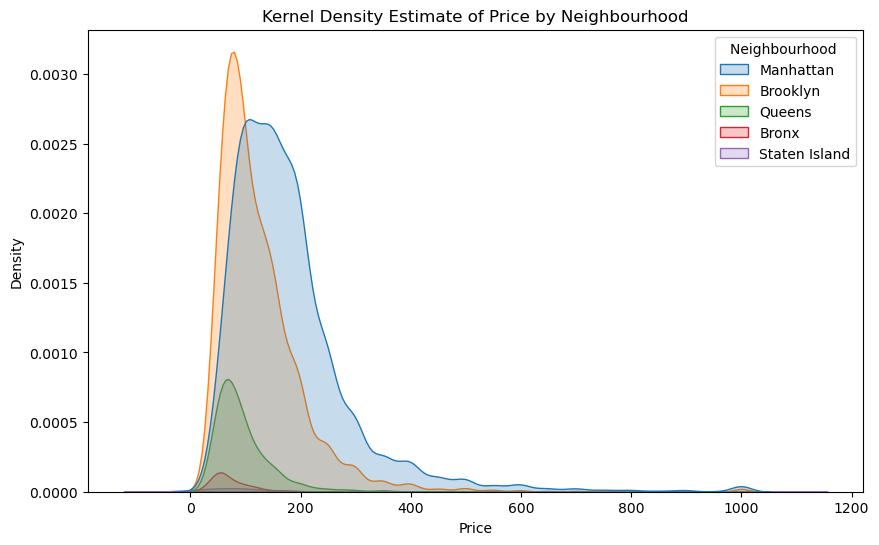

In [18]:
plt.figure(figsize=(10, 6)) #Creating a KDE plot in orther to view distribution of price through the neighbourhood
sns.kdeplot(data=bnb, x='Capped Price', hue='Neighbourhood ', fill=True, common_norm=True)

# Adding titles and labels
plt.title('Kernel Density Estimate of Price by Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Density')

# Show the plot
plt.show()

This KDE plot is normalized, and shows that on average, Manhattan airbnbs are pricier per night (as the blue curve is shifted more right). It appears that Brooklyn is the cheapest on average.

Text(0, 0.5, 'Log of Proportion')

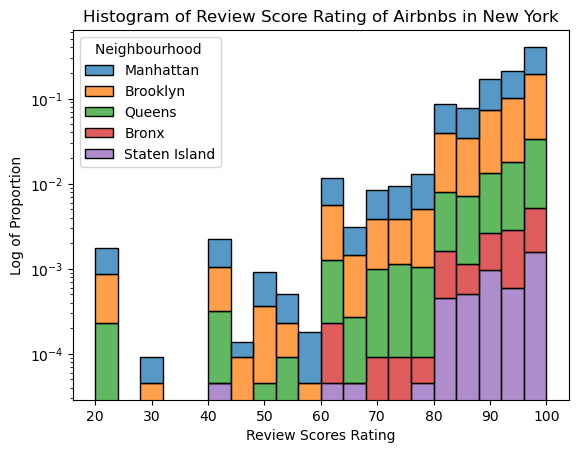

In [20]:
sns.histplot(data= bnb, bins=20, x='Review Scores Rating', hue='Neighbourhood ', edgecolor='black', stat='probability',color='red', multiple='stack') #Creating a stacked histogram to few rating of airbnbs by boroughs
plt.title('Histogram of Review Score Rating of Airbnbs in New York')
plt.yscale('log')
plt.ylabel('Log of Proportion')

This is a distribution of the score ratings, most of the scores are around 90-100, which means these airbnbs are generally highly rated. I took the y log of proportion in order to account for the higher number of Manhattan listings. It seems that Staten Island is most consistently highly rate, whereas Manhattan, Brooklyn, and Queens are quite spread out. This is probably due to their higher number of listings.

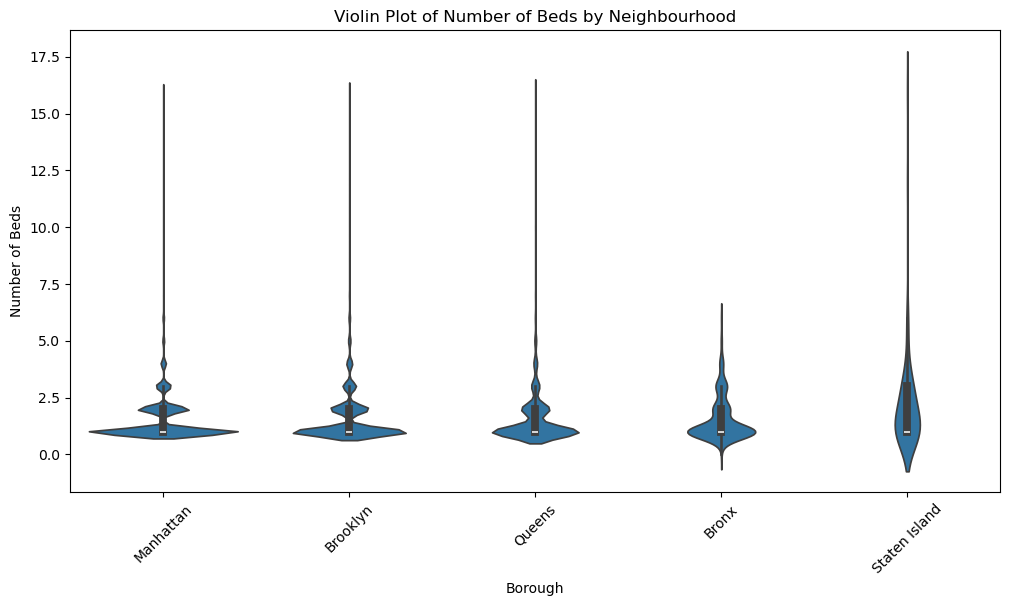

In [22]:
plt.figure(figsize=(12,6)) #Creating violin plots to view the number of bed by borough
sns.violinplot(x='Neighbourhood ', y='Beds', data=bnb)

# Add labels and title
plt.title('Violin Plot of Number of Beds by Neighbourhood')
plt.xlabel('Borough')
plt.ylabel('Number of Beds')
plt.xticks(rotation=45)
plt.show()

It seems that as the boroughs become less urban, the number of beds in the airbnb grows on average.

In [24]:
bnb

,Host Since,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number Of Reviews,Price,Review Scores Rating,Capped Price
4,2008-06-26,Manhattan,Apartment,95.0,Private room,10036.0,3.0,39,549,96.0,549
5,2008-07-25,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,4,149,100.0,149
6,2008-08-12,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,9,250,100.0,250
7,2008-08-15,Brooklyn,Apartment,90.0,Private room,11201.0,1.0,80,90,94.0,90
8,2008-08-20,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,95,270,90.0,270
...,...,...,...,...,...,...,...,...,...,...,...
30332,2015-08-24,Manhattan,Apartment,100.0,Entire home/apt,10003.0,1.0,1,90,100.0,90
30347,2015-08-24,Brooklyn,Apartment,80.0,Private room,11222.0,1.0,1,65,80.0,65
30378,2015-08-25,Brooklyn,Loft,100.0,Shared room,11206.0,1.0,1,55,100.0,55
30404,2015-08-27,Brooklyn,Apartment,100.0,Private room,11206.0,1.0,1,60,100.0,60


In [25]:
bnb_oh= pd.get_dummies(bnb, columns= ['Neighbourhood ', 'Room Type', 'Property Type'], drop_first=True) #One-hot-encoding variables of interest, drop_first=True to avoid multicollinearity
bnb_oh=bnb_oh.drop(columns=['Capped Price'])
bnb_oh

,Host Since,Review Scores Rating (bin),Zipcode,Beds,Number Of Reviews,Price,Review Scores Rating,Neighbourhood _Brooklyn,Neighbourhood _Manhattan,Neighbourhood _Queens,...,Property Type_Condominium,Property Type_Dorm,Property Type_House,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa
4,2008-06-26,95.0,10036.0,3.0,39,549,96.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,2008-07-25,100.0,11222.0,1.0,4,149,100.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2008-08-12,100.0,10004.0,1.0,9,250,100.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,2008-08-15,90.0,11201.0,1.0,80,90,94.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2008-08-20,90.0,10009.0,2.0,95,270,90.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30332,2015-08-24,100.0,10003.0,1.0,1,90,100.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
30347,2015-08-24,80.0,11222.0,1.0,1,65,80.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30378,2015-08-25,100.0,11206.0,1.0,1,55,100.0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
30404,2015-08-27,100.0,11206.0,1.0,1,60,100.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
from sklearn.model_selection import train_test_split

X=bnb_oh.drop(columns=['Price']) #Defining X and Y variables
y=bnb_oh['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

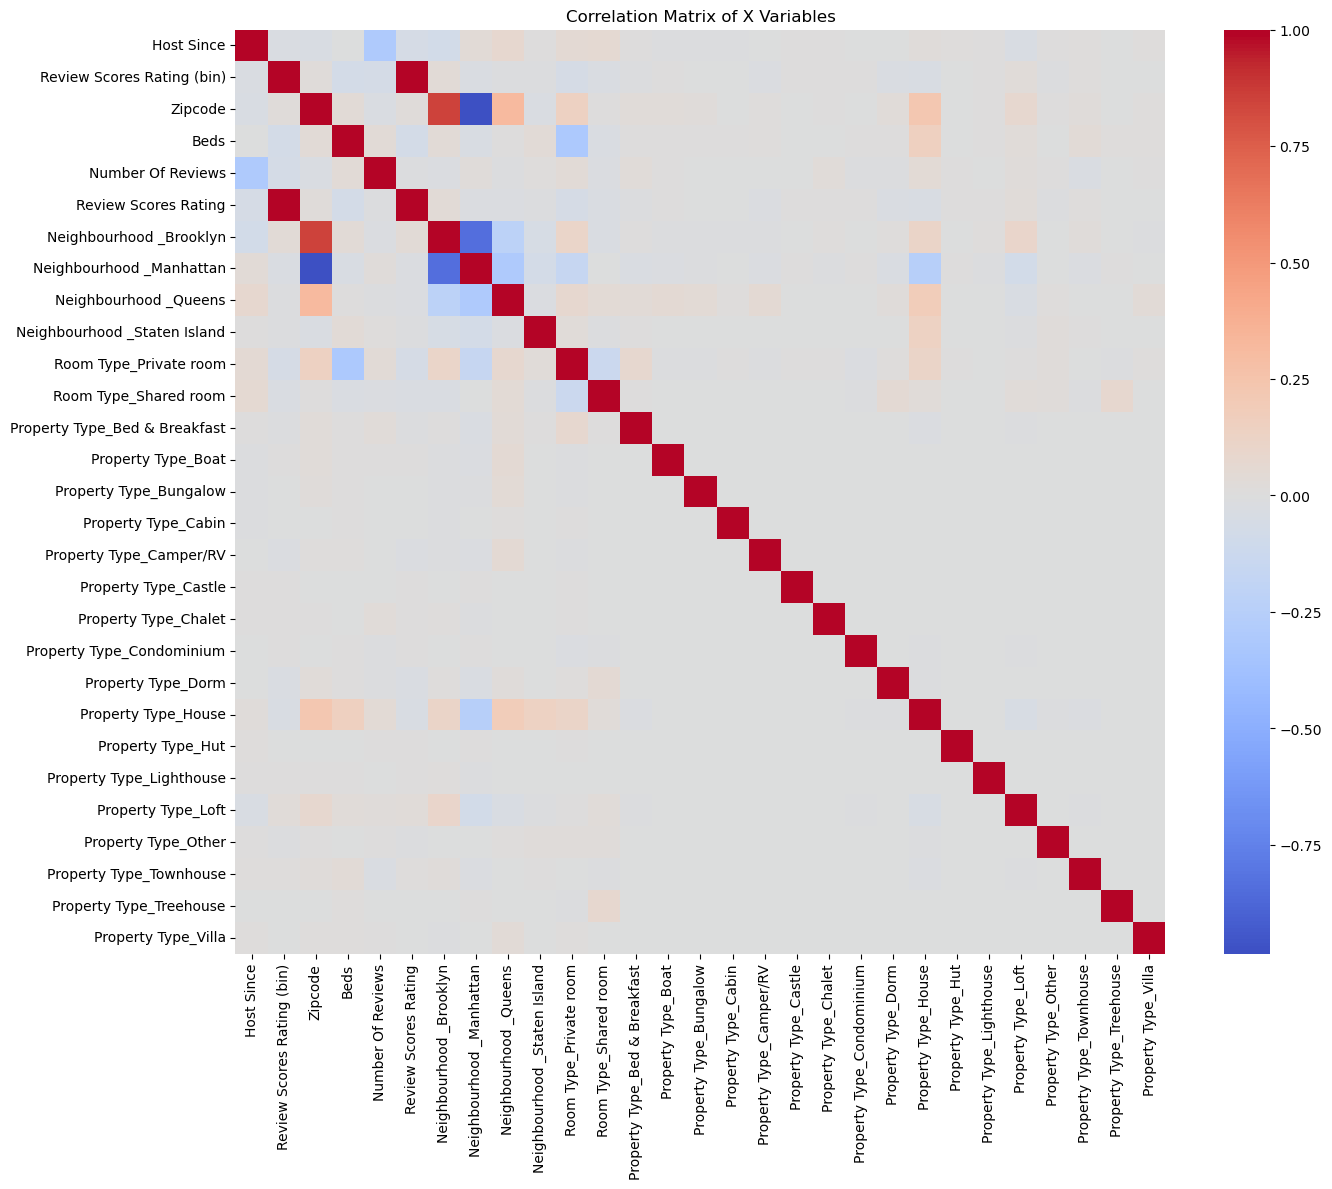

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr() 
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0) #Correlation matrix
plt.title('Correlation Matrix of X Variables')
plt.show()

In [28]:
bnb_oh=bnb_oh.drop(columns=['Host Since', 'Review Scores Rating (bin)','Zipcode']) #Dropping variables that showed strong correlation with others or were not necessary (Zipcode and Review Scores Rating (bin))

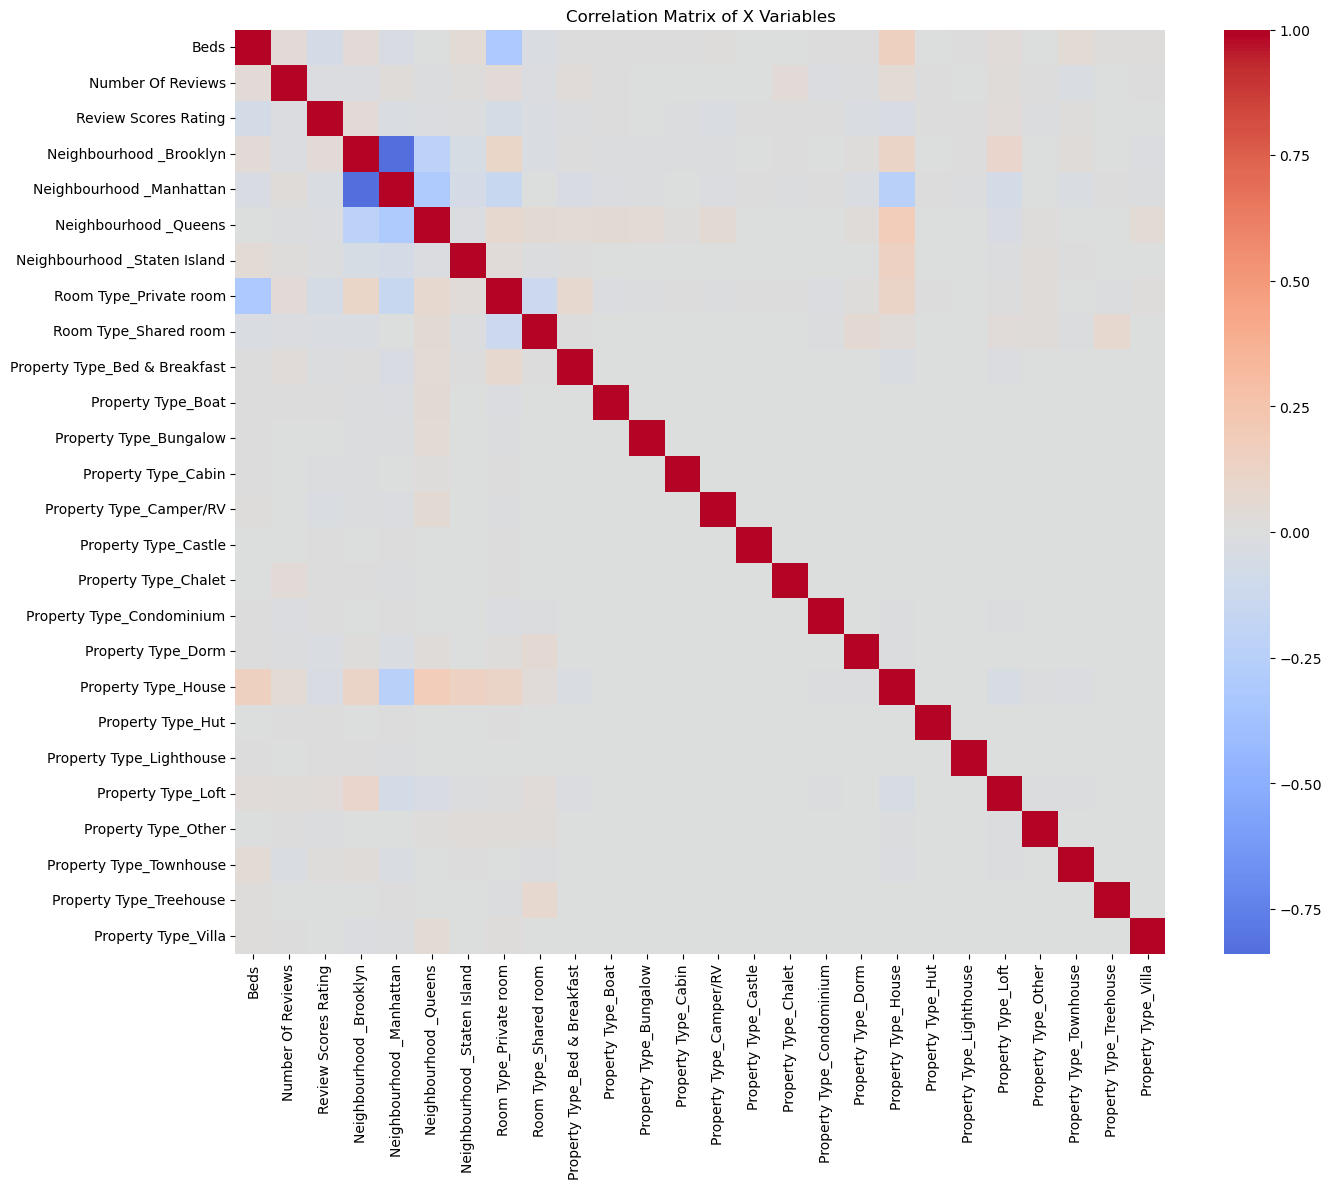

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr() #Creating a correlation matrix with dropped variables
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of X Variables')
plt.show()

After dropping the variables that were obviously leading to multicollinearity, I have a cleaner correlation matrix. Still, Brooklyn and Manhattan show up dark blue in relation to one another. This is most likely because the greatest number of observations come from these boroughs, as a result, when it's not one it's usually the other (leading to a modeled negative correlation). The same is true for beds. Since we are looking at airbnbs in New York, the greatest number of spaces probably have one or two beds

In [29]:
from sklearn.model_selection import train_test_split

X=bnb_oh.drop(columns=['Price']) #Establishing X and Y
y=bnb_oh['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28) #Training, testing, and splitting my data

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

mdl = LinearRegression() #Establishing my model
mdl.fit(X_train, y_train) #Fitting my model

y_preds = mdl.predict(X_test) #Predicting Ys with my model
test_rmse = np.sqrt(mean_squared_error(y_test, y_preds)) #Rmse 
r2_score=r2_score(y_test, y_preds) #R2

In [33]:
print(test_rmse)
print(r2_score)

108.13677133789781
0.33294662348289317


Poorly performing model.

In [36]:
X=bnb_oh.drop(columns=['Price', 'Neighbourhood _Brooklyn', 'Neighbourhood _Manhattan', 'Neighbourhood _Queens','Neighbourhood _Staten Island']) #Dropping the neighbourhood variable
y=bnb_oh['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28) #Training, testing, and splitting

In [37]:
from sklearn.metrics import r2_score

mdl1 = LinearRegression() #Defining my model
mdl1.fit(X_train, y_train) #Fitting the model

y_preds = mdl1.predict(X_test) #Predicting y using the new model
test_rmse = np.sqrt(mean_squared_error(y_test, y_preds))
r2 =r2_score(y_test, y_preds)

print(test_rmse)
print(r2)

110.91541951956442
0.29822540537998776


Getting rid of neighbourhood significantly decreased the performance of model

In [38]:
X=bnb_oh.drop(columns=['Price', 'Neighbourhood _Brooklyn', 'Neighbourhood _Manhattan', 'Neighbourhood _Queens','Neighbourhood _Staten Island','Review Scores Rating'])#Also getting rid of Review Scores Rating
y=bnb_oh['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28) #Training, Testing, Splitting the data

In [39]:
from sklearn.metrics import r2_score

mdl2 = LinearRegression() #Defining the model
mdl2.fit(X_train, y_train) #Training the model

y_preds = mdl2.predict(X_test) #Predicting the Price with the new model
test_rmse = np.sqrt(mean_squared_error(y_test, y_preds)) 
r2 =r2_score(y_test, y_preds)

print(test_rmse)
print(r2)

110.77956466373553
0.2999434910791531


Low predicitng model, removing Review Scores Rating increased performance slightly, this probably means that the relationship between Review Scores Rating and Price is underfit and not properly captured.

#### The Model that Worked Best ####

In [141]:
X=bnb_oh.drop(columns=['Price']) 
y=bnb_oh['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [41]:
from sklearn.metrics import r2_score
mdl = LinearRegression()
mdl.fit(X_train, y_train)

y_preds = mdl.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_preds))
r2_score=r2_score(y_test, y_preds)

print(test_rmse)
print(r2_score)

108.13677133789781
0.33294662348289317


In [42]:
print(X.dtypes) #Checking dtypes to verify which variables are purely numeric (not bool)

Beds                             float64
Number Of Reviews                  int64
Review Scores Rating             float64
Neighbourhood _Brooklyn             bool
Neighbourhood _Manhattan            bool
Neighbourhood _Queens               bool
Neighbourhood _Staten Island        bool
Room Type_Private room              bool
Room Type_Shared room               bool
Property Type_Bed & Breakfast       bool
Property Type_Boat                  bool
Property Type_Bungalow              bool
Property Type_Cabin                 bool
Property Type_Camper/RV             bool
Property Type_Castle                bool
Property Type_Chalet                bool
Property Type_Condominium           bool
Property Type_Dorm                  bool
Property Type_House                 bool
Property Type_Hut                   bool
Property Type_Lighthouse            bool
Property Type_Loft                  bool
Property Type_Other                 bool
Property Type_Townhouse             bool
Property Type_Tr

In [43]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns #Selecting only my continuous variables
X_numeric = X[numeric_cols]

In [44]:
bnb_oh

,Beds,Number Of Reviews,Price,Review Scores Rating,Neighbourhood _Brooklyn,Neighbourhood _Manhattan,Neighbourhood _Queens,Neighbourhood _Staten Island,Room Type_Private room,Room Type_Shared room,...,Property Type_Condominium,Property Type_Dorm,Property Type_House,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa
4,3.0,39,549,96.0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,1.0,4,149,100.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1.0,9,250,100.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1.0,80,90,94.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,2.0,95,270,90.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30332,1.0,1,90,100.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30347,1.0,1,65,80.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
30378,1.0,1,55,100.0,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
30404,1.0,1,60,100.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [94]:
!pip install scipy #Installing necessary tools to winsorize and deal with severe outliers
from scipy.stats.mstats import winsorize

In [97]:
from sklearn.linear_model import LinearRegression # Import linear regression model
df = bnb_oh # Define dataframe
df.loc[:, ['Price', 'Number Of Reviews','Review Scores Rating']]= df.loc[:,['Price', 'Number Of Reviews','Review Scores Rating'] ].apply(winsorize)
y = df['Price'] # Target variable
df['Number Of Reviews X Review Scores Rating'] = df['Number Of Reviews']*df['Review Scores Rating'] # Interaction term
#X_d = pd.get_dummies(df['brand'],dtype='int',drop_first=True) # Create brand dummies
X_n = df.loc[:,['Number Of Reviews','Review Scores Rating', 'Number Of Reviews X Review Scores Rating']]
#X = pd.concat([X_n,X_d],axis=1)
X = X_n
reg = LinearRegression(fit_intercept=True).fit(X, y) # Fit the linear model
print('Rsq: ', reg.score(X,y) )

Rsq:  0.00493083215706136


In [113]:
var =  'Number Of Reviews'
x_k = X[var]
X_mk = X.drop(var,axis=1)
## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)
## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

Partial R^2:  2.7217197084761224e-05


[Text(0.5, 1.0, 'Scatterplot of Residuals')]

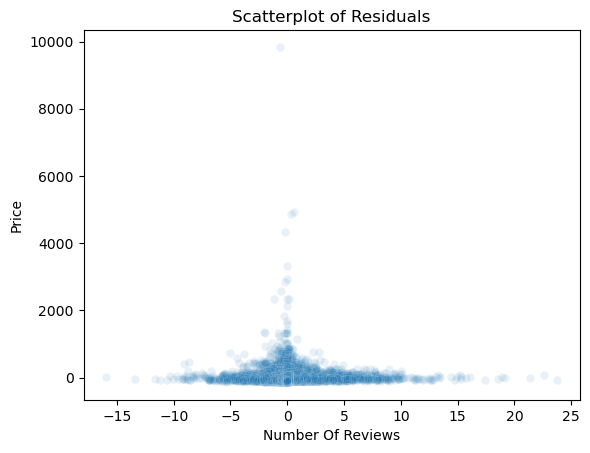

In [115]:
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) #Fitting a regression model
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) ) #Calculating R^2
sns.scatterplot(y=r_y, x=r_x,alpha=.1).set(title='Scatterplot of Residuals') #PLotting the scatterplot of residuals

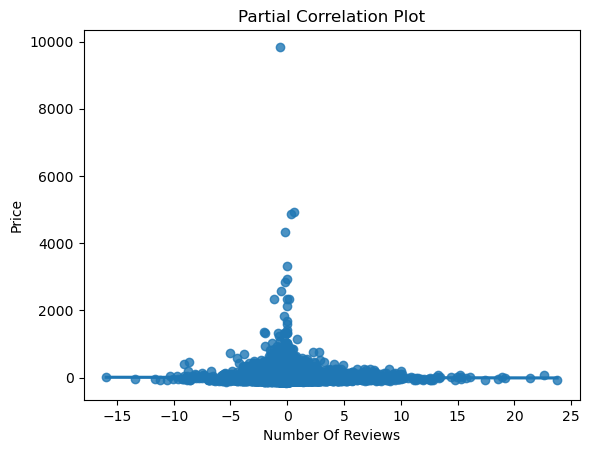

In [117]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot') #Plotting the partial correlation plot
plt.show()

In [119]:
var =  'Review Scores Rating'
x_k = X[var]
X_mk = X.drop(var,axis=1)

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

Partial R^2:  0.1947285001810406


[Text(0.5, 1.0, 'Scatterplot of Residuals')]

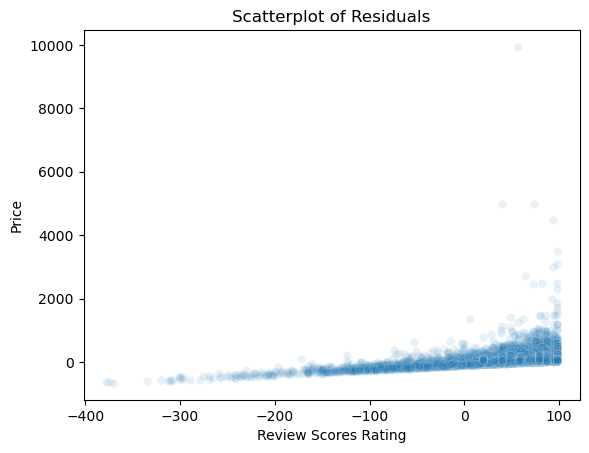

In [122]:
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())  #Fitting a regression model
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) ) #Calculating R^2
sns.scatterplot(y=r_y, x=r_x,alpha=.1).set(title='Scatterplot of Residuals') #PLotting the scatterplot of residuals

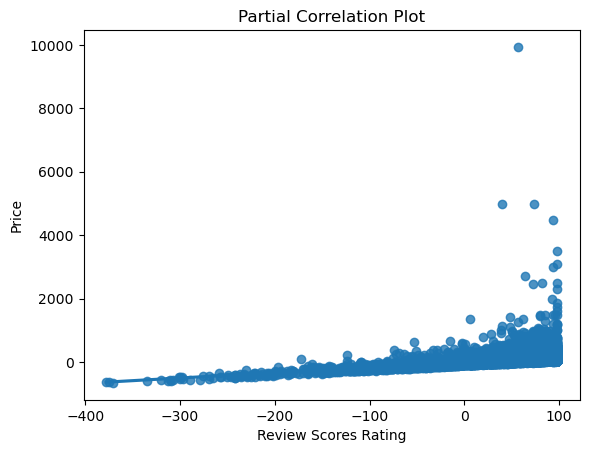

In [121]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot') #PLotting the partial correlation plot
plt.show()

In [125]:
df['Price_log'] = np.log(df['Price']) #Tranforming my y variable because I see funneling in the residual plot of Review Scores Rating
y_transformed = df['Price_log']
X = df[['Number Of Reviews', 'Review Scores Rating', 'Number Of Reviews X Review Scores Rating']]  # Features
reg = LinearRegression(fit_intercept=True).fit(X, y_transformed) #Fiting a linear model on this tranformed y
print('R-squared on transformed model: ', reg.score(X, y_transformed)) #Calculting R^2

R-squared on transformed model:  0.014974953374095601


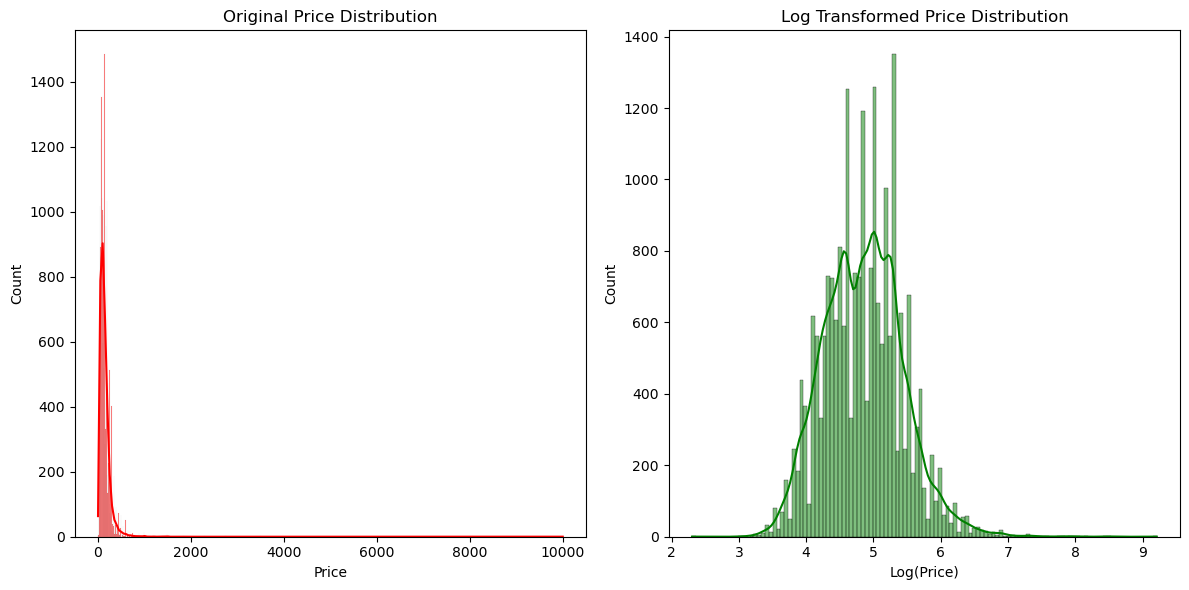

In [144]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, color='red')
plt.title('Original Price Distribution')
plt.xlabel('Price')

# Plot transformed Price_log distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Price_log'], kde=True, color='green')
plt.title('Log Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.tight_layout()
plt.show()

We are looking at distribution of the Y variable, perhaps it would've done us well to noticed this in the EDA stage.

In [147]:
X=bnb_oh.drop(columns=['Price','Price_log']) #Defining X with new tranformation
y=bnb_oh['Price_log'] #Defining y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28) #Training, testing, and splitting

In [149]:
X

,Beds,Number Of Reviews,Review Scores Rating,Neighbourhood _Brooklyn,Neighbourhood _Manhattan,Neighbourhood _Queens,Neighbourhood _Staten Island,Room Type_Private room,Room Type_Shared room,Property Type_Bed & Breakfast,...,Property Type_Dorm,Property Type_House,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Number Of Reviews X Review Scores Rating
4,3.0,39,96.0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,3744.0
5,1.0,4,100.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,400.0
6,1.0,9,100.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,900.0
7,1.0,80,94.0,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,7520.0
8,2.0,95,90.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,8550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30332,1.0,1,100.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,100.0
30347,1.0,1,80.0,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,80.0
30378,1.0,1,100.0,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,100.0
30404,1.0,1,100.0,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,100.0


In [151]:
from sklearn.metrics import r2_score

mdl = LinearRegression() #Defining the linear regression
mdl.fit(X_train, y_train) #Fitting the model

y_preds = mdl.predict(X_test) #Predicint Ys
test_rmse = np.sqrt(mean_squared_error(y_test, y_preds))
r2_score=r2_score(y_test, y_preds)

print(test_rmse)
print(r2_score)

0.3722235647660732
0.603851855800995


#### Conclusion and Lessons Learned ####

My model initially was performing very poorly. This told me that perhaps the variables I had were not doing well at predicting the price. Intially, applying different transformations to the X did very little to change the error and R^2 score of my data. I applied arcsinh, log, and -log to my numeric x variables. When I applied transformations to my X variables, integrated them back in and the model performance didn't change, it seemed that I wasn't capturing the true relationship between the continuous variables and the target variables-- price. After creating partial correlation plots and examining the intervariable interactions, I realized that with "Review Scores Rating" the data was funneling out. This implied heteroscedasticity or some sort of nonlinear relationship. As a result, I tranformed the targest variable using log. It seemed to me that there was greater variance in "Review Scores Rating" as the price increased. This was mitigated by log transformation of price. 

I've learned that model selection is a process. It requires starting from scratch and examining relationships. I learned that if a model is underfitting, we may not be capturing the relationship between the covariates and the target variable. I thought it was interesting I had to transform the targest variable to create a more accurate model. I think this had to do with the high distribution and number of outliers for price. There was less error around lower prices, meaning that price tended to vary more when it was higher, and thus the relationship between the covariates and target variable was not well explained. This was so interesting to see!